In [6]:
# 가설검정을 위해 scipy 패키지 불러오기 

import scipy as sp


In [27]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')                 # 한글처리위함
plt.rcParams['axes.unicode_minus'] = False    #축의 음수 기호 표시

In [7]:
import pandas as pd
test = pd.read_csv('data/chick003.csv')  # test 변수에 데이터셋 입력
test

,hatchery,chick_nm,weight
0,A,a01,112
1,A,a05,116
2,A,a09,106
3,A,a12,104
4,A,a15,116
5,A,a17,118
6,A,a26,110
7,A,a28,112
8,A,a29,106
9,A,a30,108


<function matplotlib.pyplot.show(close=None, block=None)>

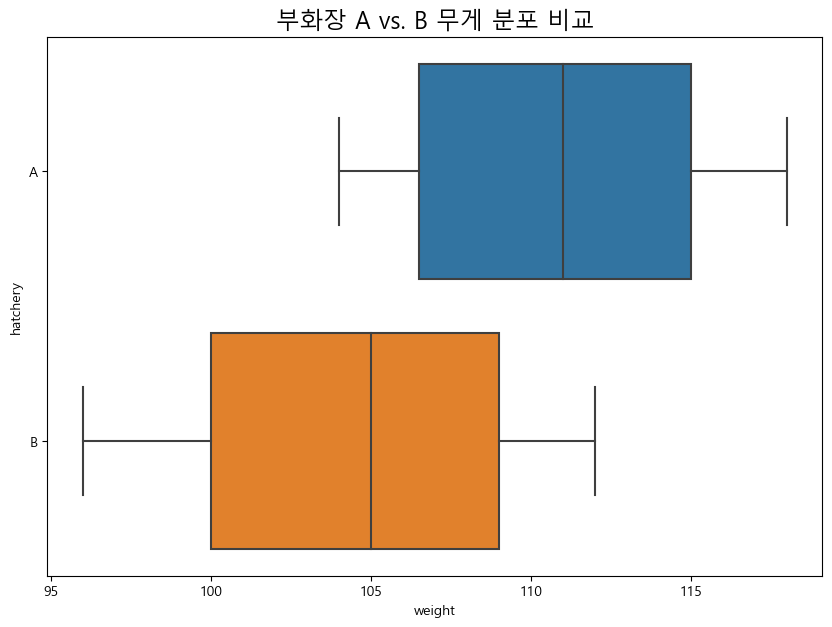

In [28]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.boxplot(x = 'weight', y='hatchery', data=test)
plt.title('부화장 A vs. B 무게 분포 비교', fontsize=17)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

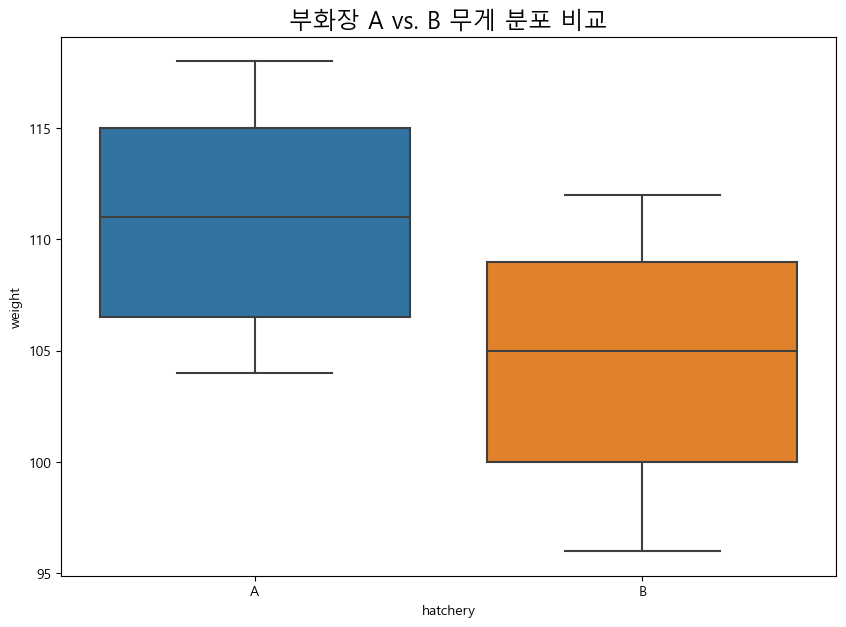

In [29]:
# import pandas as pd
# test = pd.read_csv('data/chick003.csv')  # test 변수에 데이터셋 입력
# test      
# 위 코드 위에서 실행 전제하에 아래 박스플랏

import seaborn as sns
plt.figure(figsize=(10,7))
sns.boxplot(x ='hatchery', y= 'weight', data=test)
plt.title('부화장 A vs. B 무게 분포 비교', fontsize=17)
plt.show

In [30]:
# 가설검정을 위해 scipy 패키지 불러오기 

import scipy as sp

In [16]:
# 부화장 A만 별도로 데이터셋 구성
test_a = test.loc[test.hatchery == 'A', 'weight']  # loc- lacation의 약자    테스트에서 해처리 항목 중A에서weight' 
test_a

0    112
1    116
2    106
3    104
4    116
5    118
6    110
7    112
8    106
9    108
Name: weight, dtype: int64

In [17]:
# 부화장 A만 별도로 데이터셋 구성
test_a = test.loc[test.hatchery == 'A', 'weight']  # loc- lacation의 약자    테스트에서 해처리 항목 중A에서weight' 
test_a

0    112
1    116
2    106
3    104
4    116
5    118
6    110
7    112
8    106
9    108
Name: weight, dtype: int64

In [18]:
# 부화장 B만 별도로 데이터셋 구성
test_b = test.loc[test.hatchery == 'B', 'weight']
test_b

10    100
11    110
12     98
13    100
14    104
15    112
16    106
17    106
18     96
19    110
Name: weight, dtype: int64

p벨류 값이 0.05보다 작아야  귀무가설 기각인데 

p벨류 값이 0.05보다 크므로 귀무가설 채택

샤피로 윌크 검정 귀무가설은 - 정규분포를 이루고 있다 이므로
결론 정규분포를 이루고 있다

gpt>


scipy.stats.shapiro 함수는 샤피로-윌크(Shapiro-Wilk) 검정을 수행하는 함수입니다. 
이는 주어진 데이터 샘플이 정규 분포를 따르는지 여부를 검정하는 통계적인 방법 중 하나입니다.

함수의 인자 test_a는 정규성을 검정하려는 데이터 샘플을 나타냅니다. 
이 함수는 두 개의 값을 반환합니다. 
첫 번째 값은 통계량(Shapiro-Wilk 통계량), 두 번째 값은 해당 통계량에 대한 p-value입니다.

검정의 기본 가설은 다음과 같습니다:

귀무가설 (H0): 데이터는 정규 분포를 따른다.
대립가설 (H1): 데이터는 정규 분포를 따르지 않는다.

만약 p-value가 일정한 유의수준(일반적으로 0.05)보다 작다면,
귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 
따라서 작은 p-value는 데이터가 정규 분포를 따르지 않는다는 강력한 증거로 해석됩니다.

예를 들어, 코드 sp.stats.shapiro(test_a)의 결과가 (0.987, 0.123)이라면, 
통계량이 0.987이고 p-value가 0.123이므로, 주어진 데이터가 정규 분포를 따르지 않을 가능성이 높지 않다고 할 수 있습니다.

In [19]:
# 부화장 B 샤피로 윌크 검정 실시 
sp.stats.shapiro(test_a)

ShapiroResult(statistic=0.9400018453598022, pvalue=0.5530338883399963)

In [20]:
# 부화장 A,B 두 집단 간 평균 검정
sp.stats.ttest_ind(test_a,test_b)

Ttest_indResult(statistic=2.842528280230058, pvalue=0.010803990633924202)